In [ ]:
!pip install libpysal esda
!pip install libpysal spreg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 4.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

wai_path = "/content/drive/MyDrive/GEOG0105/lsoa_wai_scored.csv"
wai_df = pd.read_csv(wai_path)
df = pd.read_csv("/content/drive/MyDrive/GEOG0105/data_spatial_analysis/merged_final_lsoa.csv")


In [ ]:
wai_sub = wai_df[["lsoa21cd", "WAI"]]

df = df.merge(wai_sub, left_on="LSOA_code", right_on="lsoa21cd", how="left")

df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   LSOA_code                              40 non-null     object 
 1   OA_M1_raw                              40 non-null     float64
 2   OA_M2_raw                              40 non-null     float64
 3   OA_M3_raw                              40 non-null     float64
 4   GEOGRAPHY                              40 non-null     object 
 5   LSOA_name                              40 non-null     object 
 6   IMD_Rank                               40 non-null     float64
 7   IMD_Decile                             40 non-null     float64
 8   IMDScore                               40 non-null     float64
 9   IncScore                               40 non-null     float64
 10  EmpScore                               40 non-null     float64
 11  EduScore

,LSOA_code,OA_M1_raw,OA_M2_raw,OA_M3_raw,GEOGRAPHY,LSOA_name,IMD_Rank,IMD_Decile,IMDScore,IncScore,...,BHSScore,EnvScore,local authority code,local authority name,All Usual residents,Disabled; activities limited a lot,Disabled; activities limited a little,Not disabled,lsoa21cd,WAI
0,E01000002,13.333333,13.166667,12.833333,LSOA,City of London 001B,30379.0,10.0,5.143,0.0340,...,24.4120,23.0840,E09000001,City of London,1385.0,34.0,113.0,1238.0,E01000002,21.3875
1,E01000005,16.250000,15.750000,15.500000,LSOA,City of London 001E,8678.0,3.0,28.652,0.2110,...,39.9000,28.9790,E09000001,City of London,1098.0,86.0,102.0,910.0,E01000005,23.7000
2,E01000850,22.000000,22.000000,21.600000,LSOA,Camden 026A,19686.0,6.0,14.252,0.0620,...,26.9330,53.2590,E09000007,Camden,1425.0,56.0,103.0,1266.0,E01000850,26.7625
3,E01000851,17.600000,17.400000,17.000000,LSOA,Camden 026B,18953.0,6.0,14.959,0.0430,...,25.4630,73.9540,E09000007,Camden,1479.0,49.0,121.0,1309.0,E01000851,26.4875
4,E01000853,15.666667,15.666667,15.000000,LSOA,Camden 025A,7640.0,3.0,30.826,0.2260,...,21.2080,37.0160,E09000007,Camden,1406.0,203.0,158.0,1045.0,E01000853,23.7625
5,E01000855,16.714286,16.571429,16.857143,LSOA,Camden 028A,19276.0,6.0,14.660,0.0480,...,29.2180,55.4550,E09000007,Camden,1307.0,64.0,109.0,1134.0,E01000855,26.1875
6,E01000914,24.333333,24.166667,24.333333,LSOA,Camden 028B,20943.0,7.0,13.106,0.0730,...,22.2430,49.7840,E09000007,Camden,1423.0,78.0,130.0,1215.0,E01000914,18.9125
7,E01000916,20.833333,20.333333,20.166667,LSOA,Camden 027B,14830.0,5.0,19.491,0.1350,...,25.3410,51.2680,E09000007,Camden,1857.0,126.0,151.0,1580.0,E01000916,15.2000
8,E01000918,18.714286,18.428571,17.857143,LSOA,Camden 028C,13788.0,5.0,20.684,0.1310,...,23.4610,52.3950,E09000007,Camden,1800.0,157.0,167.0,1476.0,E01000918,23.5250
9,E01000919,24.800000,25.200000,25.000000,LSOA,Camden 028D,12962.0,4.0,21.741,0.1160,...,23.4230,48.1660,E09000007,Camden,1437.0,133.0,134.0,1170.0,E01000919,27.4875


In [ ]:
df = df.rename(columns={
    "Disabled; activities limited a lot": "disability_lot",
    "Disabled; activities limited a little": "disability_little",
    "All Usual residents": "population"
})

df["disability_total"] = df["disability_lot"] + df["disability_little"]

df["disability_rate"] = df["disability_total"] / df["population"]


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

lsoa_shp = "/content/drive/MyDrive/GEOG0105/Research_Area/research_area.shp"

lsoa_gdf = gpd.read_file(lsoa_shp).to_crs("EPSG:4326")

print(lsoa_gdf.columns)


Index(['lsoa21cd', 'lsoa21nm', 'msoa21cd', 'msoa21nm', 'lad22cd', 'lad22nm',
       'geometry'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()
lsoa_gdf.columns = lsoa_gdf.columns.str.strip()

gdf = lsoa_gdf.merge(
    df[["lsoa21cd", "WAI", "IMDScore", "OA_M3_raw", "disability_rate"]],
    on="lsoa21cd", how="left"
)


In [ ]:
from scipy.stats import zscore

for col in ["WAI", "OA_M3_raw", "IMDScore", "disability_rate"]:
    gdf[f"{col}_z"] = zscore(gdf[col])



In [ ]:
gdf["Mismatch_WAI_Walk"] = gdf["OA_M3_raw_z"] - gdf["WAI_z"]
gdf["Mismatch_WAI_IMD"] = gdf["IMDScore_z"] - gdf["WAI_z"]
gdf["Mismatch_WAI_Disability"] = gdf["disability_rate_z"] - gdf["WAI_z"]


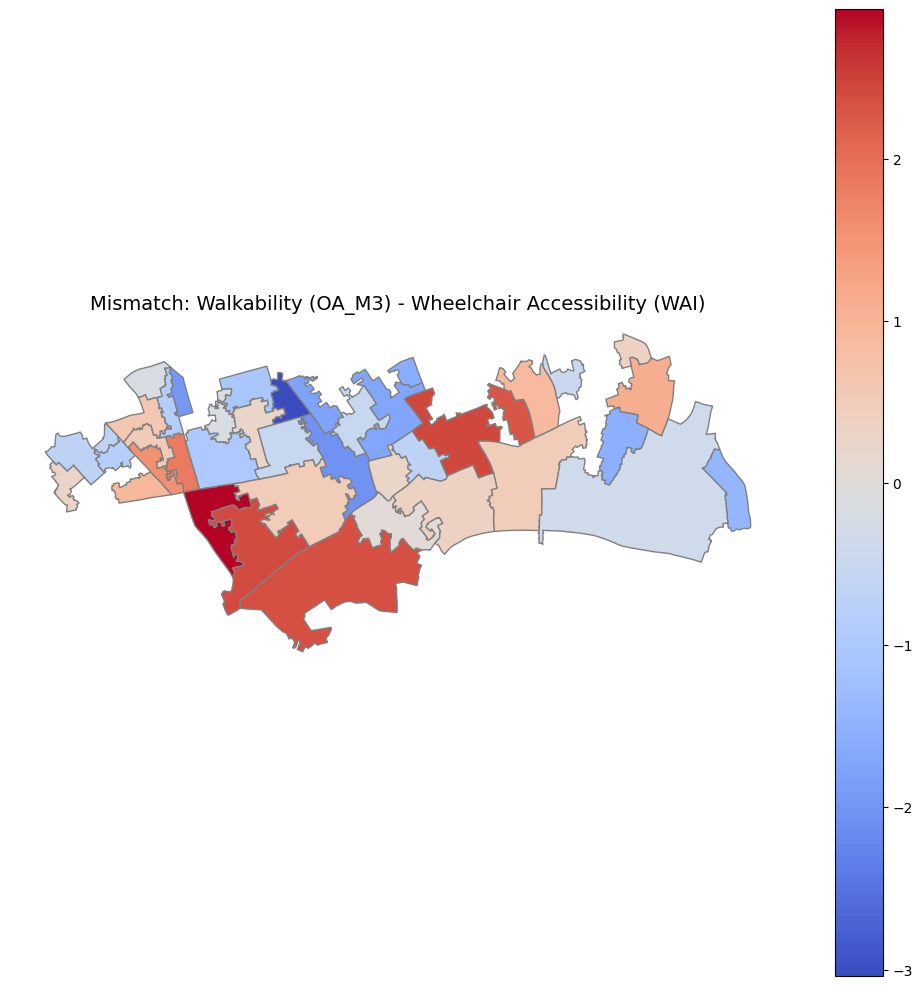

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column="Mismatch_WAI_Walk", cmap="coolwarm", legend=True, ax=ax, edgecolor="grey")
ax.set_title("Mismatch: Walkability (OA_M3) - Wheelchair Accessibility (WAI)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()


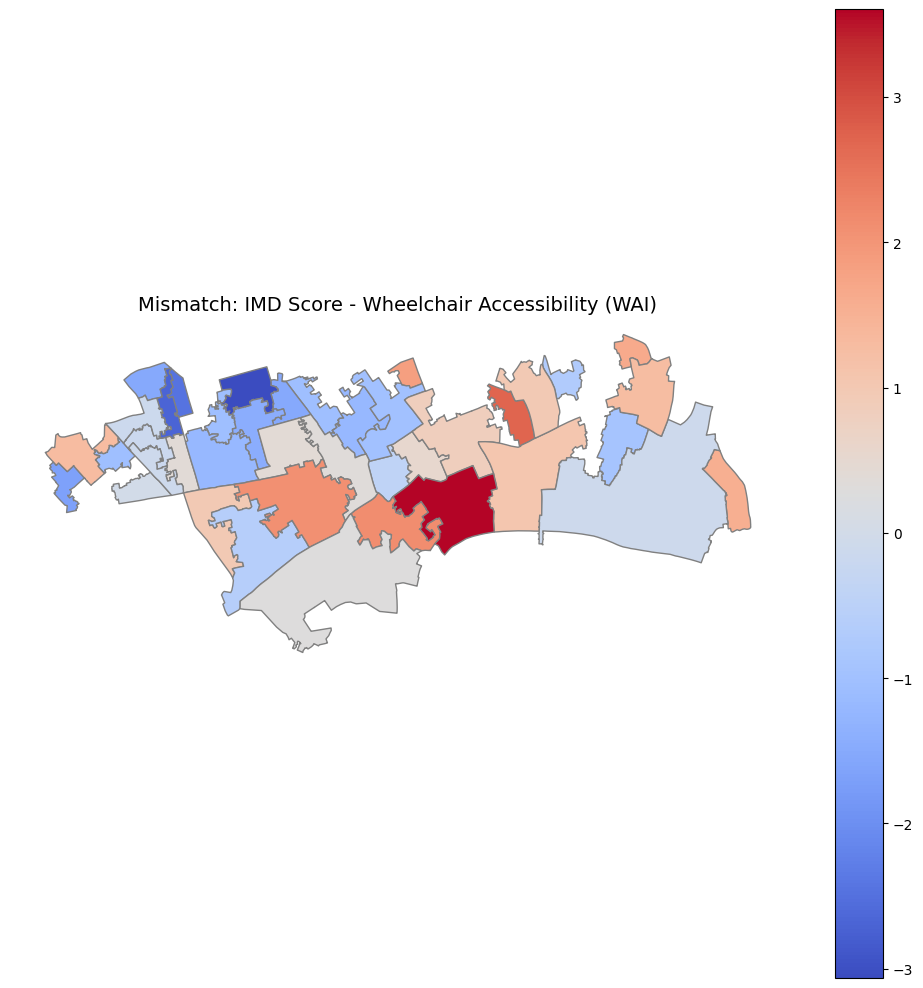

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column="Mismatch_WAI_IMD", cmap="coolwarm", legend=True, ax=ax, edgecolor="grey")
ax.set_title("Mismatch: IMD Score - Wheelchair Accessibility (WAI)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()

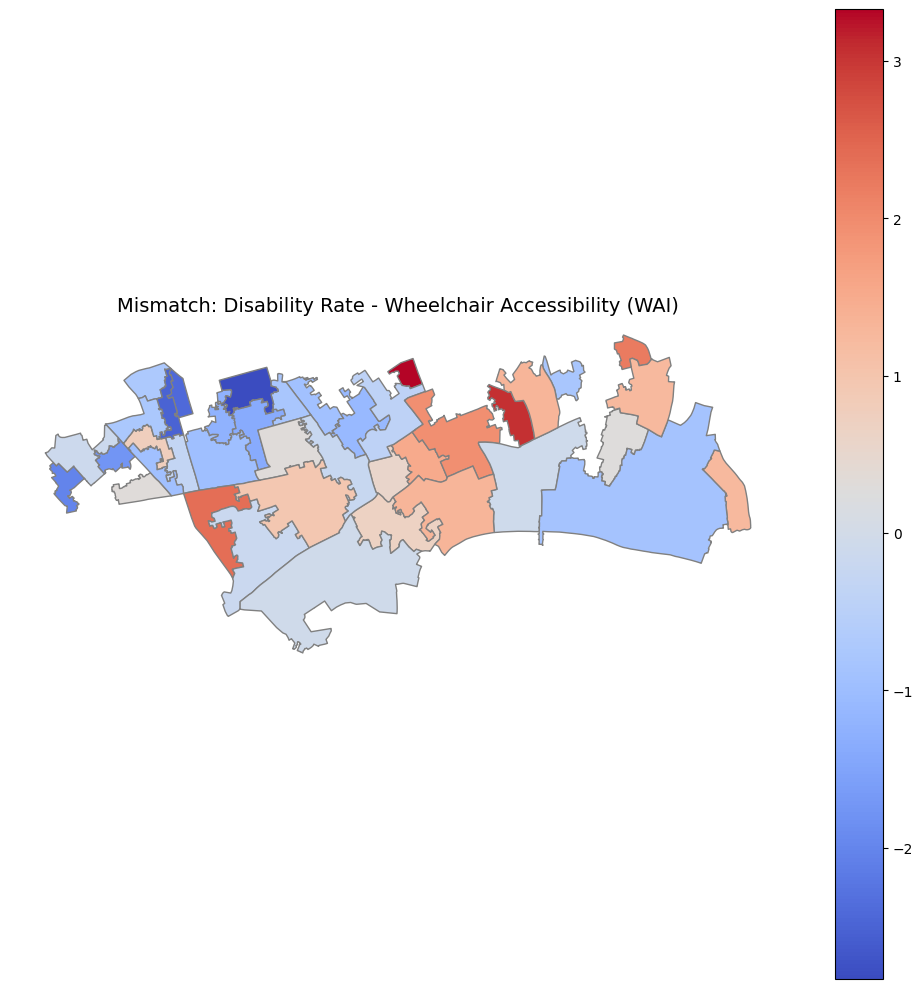

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column="Mismatch_WAI_Disability", cmap="coolwarm", legend=True, ax=ax, edgecolor="grey")
ax.set_title("Mismatch: Disability Rate - Wheelchair Accessibility (WAI)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
top_mismatch_walk = gdf.nlargest(5, "Mismatch_WAI_Walk")[["lsoa21cd", "WAI", "OA_M3_raw", "Mismatch_WAI_Walk"]]

top_mismatch_dis = gdf.nlargest(5, "Mismatch_WAI_Disability")[["lsoa21cd", "WAI", "disability_rate", "Mismatch_WAI_Disability"]]


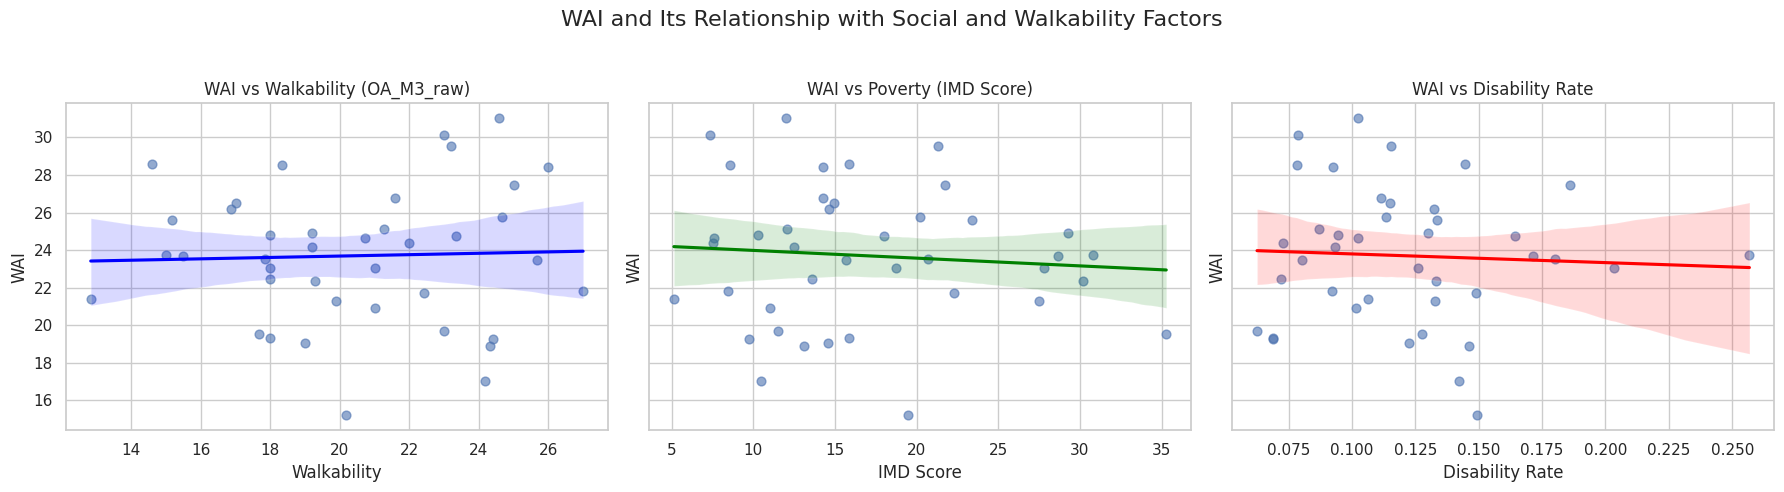

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot 1: WAI vs OA_M3_raw
sns.regplot(
    data=gdf, x="OA_M3_raw", y="WAI", ax=axes[0],
    scatter_kws={"s": 40, "alpha": 0.6}, line_kws={"color": "blue"}
)
axes[0].set_title("WAI vs Walkability (OA_M3_raw)")
axes[0].set_xlabel("Walkability")
axes[0].set_ylabel("WAI")

# Plot 2: WAI vs IMD Score (Poverty)
sns.regplot(
    data=gdf, x="IMDScore", y="WAI", ax=axes[1],
    scatter_kws={"s": 40, "alpha": 0.6}, line_kws={"color": "green"}
)
axes[1].set_title("WAI vs Poverty (IMD Score)")
axes[1].set_xlabel("IMD Score")

# Plot 3: WAI vs Disability Rate
sns.regplot(
    data=gdf, x="disability_rate", y="WAI", ax=axes[2],
    scatter_kws={"s": 40, "alpha": 0.6}, line_kws={"color": "red"}
)
axes[2].set_title("WAI vs Disability Rate")
axes[2].set_xlabel("Disability Rate")

plt.suptitle("WAI and Its Relationship with Social and Walkability Factors", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
print("Pearson correlation coefficients:")
print(f"  WAI vs OA_M3_raw:       {gdf['WAI'].corr(gdf['OA_M3_raw']):.3f}")
print(f"  WAI vs IMDScore:        {gdf['WAI'].corr(gdf['IMDScore']):.3f}")
print(f"  WAI vs disability_rate: {gdf['WAI'].corr(gdf['disability_rate']):.3f}")

Pearson correlation coefficients:
  WAI vs OA_M3_raw:       0.036
  WAI vs IMDScore:        -0.086
  WAI vs disability_rate: -0.052


In [ ]:
from esda.moran import Moran

variables = ["WAI", "OA_M3_raw", "IMDScore", "disability_rate"]
for var in variables:
    y = full_gdf[var].values
    moran = Moran(y, w)
    print(f"{var} — Moran's I = {moran.I:.4f}, p = {moran.p_sim:.4f}")


WAI — Moran's I = 0.4818, p = 0.0010
OA_M3_raw — Moran's I = 0.1827, p = 0.0580
IMDScore — Moran's I = 0.1515, p = 0.0840
disability_rate — Moran's I = 0.1234, p = 0.1110
